## Importing packages

In [1]:
import pandas as pd
import json as js
import seaborn as sns
import glob
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

## Function to add files for multiple runs

In [2]:
def AddFiles(pattern):
    files = glob.glob(pattern)

    df = pd.DataFrame({'run': pd.Series(dtype='int64'),
                       'channel': pd.Series(dtype='int64'),
                       'time': pd.Series(dtype='float64'),
                       'eventNumber': pd.Series(dtype='int64'),
                       'groupNumber': pd.Series(dtype='int64'),
                       'energy': pd.Series(dtype='float64'),
                       'isSignal': pd.Series(dtype='int64'),
                       'isPulser': pd.Series(dtype='int64'),
                       'rejectBadIntervals': pd.Series(dtype='int64'),
                       'badForAnalysis': pd.Series(dtype='int64'),
                       'singleTrigger': pd.Series(dtype='int64'),
                       'numberOfPulses': pd.Series(dtype='int64'),
                       'timeStamp': pd.Series(dtype='str'),
                       'riseTime': pd.Series(dtype='float64'),
                       'decayTime': pd.Series(dtype='float64'),
                       'delay': pd.Series(dtype='float64')})
    for f in files:
        dfTemp = pd.read_csv(f, delimiter=',', dtype={'run': 'Int64',
                       'channel': 'Int64',
                       'time': 'float64',
                       'eventNumber': 'Int64',
                       'groupNumber': 'Int64',
                       'energy': 'float64',
                       'isSignal': 'Int64',
                       'isPulser':'Int64',
                       'rejectBadIntervals':'Int64',
                       'badForAnalysis': 'Int64',
                       'singleTrigger': 'Int64',
                       'numberOfPulses': 'Int64',
                       'timeStamp': 'str',
                       'riseTime': 'float64',
                       'decayTime': 'float64',
                       'delay': 'float64'}, na_values=-1)
        df = pd.concat([df, dfTemp], join='outer')

    return df.reset_index(drop=True)

In [3]:
def AddDF(pattern):
    csv_files = glob.glob(pattern)
    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True, dtype=df.dtypes)
    return combined_df

## Function to summarize events from a single run

In [4]:
def DescribeRun(run):
    df = pd.read_csv(f"/global/homes/v/vsharma2/TriProtonDecay/DataPreparation/HighMultiNuisanceEvents/OutputFiles/Temp/{run}_data.csv", delimiter=',')
    column_names = list(df.columns)
    column_names.remove('Run')
    column_names.remove('Timestamp')
    for i in range(len(column_names)):
        df.hist(column=column_names[i], range=[df[column_names[i]].min(), df[column_names[i]].max()])
    #f.hist(column='numberOfPulses', bins=7, range=[df['numberOfPulses'].min(), df['numberOfPulses'].max()])
    print(f"Total events -- {len(df)}")
    print(f"Number of events with multiple triggers -- {len(df.query('singleTrigger!=1', engine='python'))}")
    print(f"Number of events with multiple pulses -- {len(df.query('numberOfPulses>1', engine='python'))}")
    print(f"Number of events with zero pulses -- {len(df.query('numberOfPulses==1', engine='python'))}")
    print(f"Number of events with bad intervals -- {len(df.query('rejectBadIntervals!=1', engine='python'))}")
    print(f"Number of events with bad analysis flags -- {len(df.query('badForAnalysis!=1', engine='python'))}")
    print(f"Number of events with non signals -- {len(df.query('isSignal!=1', engine='python'))}")

## Function to summarize dataframe

In [5]:
def DescribeDataframe(df):
    column_names = list(df.columns)
    column_names.remove('run')
    column_names.remove('timeStamp')
    column_names.remove('eventNumber')
    column_names.remove('groupNumber')
    for i in range(len(column_names)):
        print(column_names[i] + ':' + str(df[column_names[i]].min()) + ':' + str(df[column_names[i]].max()))
        df.replace([np.inf, -np.inf], np.nan, inplace=True)
        df.dropna(how="all", inplace=True)
        df.hist(column=column_names[i], range=[df[column_names[i]].min(), df[column_names[i]].max()])
    #f.hist(column='numberOfPulses', bins=7, range=[df['numberOfPulses'].min(), df['numberOfPulses'].max()])
    print("WARNING!! DROPPING INF VALUES")
    print(f"Total events -- {len(df)}")
    print(f"Number of events with multiple triggers -- {len(df.query('singleTrigger!=1', engine='python'))}")
    print(f"Number of events with multiple pulses -- {len(df.query('numberOfPulses>1', engine='python'))}")
    print(f"Number of events with zero pulses -- {len(df.query('numberOfPulses==1', engine='python'))}")
    print(f"Number of events with bad intervals -- {len(df.query('rejectBadIntervals!=1', engine='python'))}")
    print(f"Number of events with bad analysis flags -- {len(df.query('badForAnalysis!=1', engine='python'))}")
    print(f"Number of events with non signals -- {len(df.query('isSignal!=1', engine='python'))}")

### Filter events with numPulses==0, singleTrigger==0, rejectBadIntervals, badForAnalysis, isSignal, and energy between 0 and 10 MeV

In [6]:
def ReduceDataFrame(df):
    dfNew = df.query('numberOfPulses!=0 & singleTrigger!=0 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000', engine='python')
    print('"Lenient Cuts"')
    print('Cuts used -- numberOfPulses!=0 & singleTrigger!=0 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000')
    print('Size of reduced data -- ' + str(len(dfNew)))
    return dfNew

### Filter events with numPulses==1, singleTrigger==1, rejectBadIntervals, badForAnalysis, isSignal, and energy between 0 and 10 MeV

In [8]:
def SuperReduceDataFrame(df):
    dfNew = df.query('numberOfPulses==1 & singleTrigger==1 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000', engine='python')
    print('"Strict Cuts"')
    print('Cuts used -- numberOfPulses==1 & singleTrigger==1 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000')
    print('Size of reduced data -- ' + str(len(dfNew)))
    return dfNew

### Select events that were rejected from SuperReduceDataFrame

In [7]:
def RejectDataFrame(df):
    dfReject = df.query('numberOfPulses!=1 | singleTrigger!=1 | rejectBadIntervals==0 | badForAnalysis==0 | isSignal==0 & energy>0', engine='python')
    return dfReject

### Adding all available runs to one dataframe

In [9]:
dfTotal = AddFiles("/global/homes/v/vsharma2/TriProtonDecay/DataPreparation/HighMultiNuisanceEvents/OutputFiles/Temp/*.csv")

In [10]:
dfTotal.head()

,run,channel,time,eventNumber,groupNumber,energy,isSignal,isPulser,rejectBadIntervals,badForAnalysis,singleTrigger,numberOfPulses,timeStamp,riseTime,decayTime,delay
0,350641,14,3072.92,61650,4003,510.1710,1,0,1,1,0,1,2019-06-20 15:15:29.850640+00:50,0.154186,0.380049,3.15342
1,350641,41,3072.93,61661,4003,94.4365,1,0,1,1,1,1,2019-06-20 15:15:29.850640+00:50,0.148901,0.247557,3.15273
2,350641,27,3072.97,61697,4003,138.8850,1,0,1,1,1,1,2019-06-20 15:15:29.850640+00:50,0.212979,0.412540,3.18006
3,350641,15,3072.99,61712,4003,157.5920,1,0,1,1,1,1,2019-06-20 15:15:29.850640+00:50,0.191582,0.385725,3.18506
4,350641,28,3073.00,61713,4003,3256.3800,1,0,1,1,1,1,2019-06-20 15:15:29.850640+00:50,0.182816,0.572513,3.19969


In [11]:
dfTotal.dtypes

run                     Int64
channel                 Int64
time                  float64
eventNumber             Int64
groupNumber             Int64
energy                float64
isSignal                Int64
isPulser                Int64
rejectBadIntervals      Int64
badForAnalysis          Int64
singleTrigger           Int64
numberOfPulses          Int64
timeStamp              object
riseTime              float64
decayTime             float64
delay                 float64
dtype: object

In [12]:
print("Size of total dataframe " + str(len(dfTotal)))

Size of total dataframe 191540


channel:1:988
time:135.928:91947.9
energy:-4088820.0:19591800.0
isSignal:0:1
isPulser:0:0
rejectBadIntervals:0:1
badForAnalysis:0:1
singleTrigger:0:1
numberOfPulses:0:61
riseTime:-200.889:36.171
decayTime:-18.5833:26.4167
delay:1.1256:9.92066
WARNING!! DROPPING INF VALUES
Total events -- 191540
Number of events with multiple triggers -- 36200
Number of events with multiple pulses -- 22434
Number of events with zero pulses -- 142491
Number of events with bad intervals -- 1225
Number of events with bad analysis flags -- 1225
Number of events with non signals -- 1049


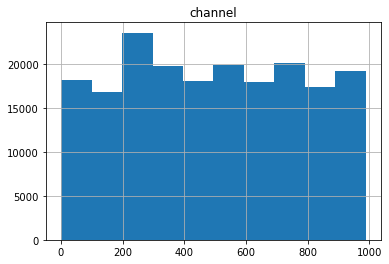

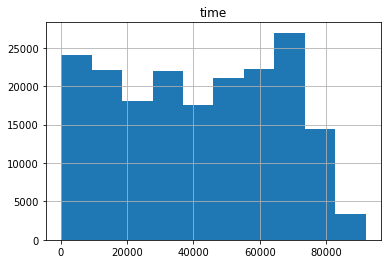

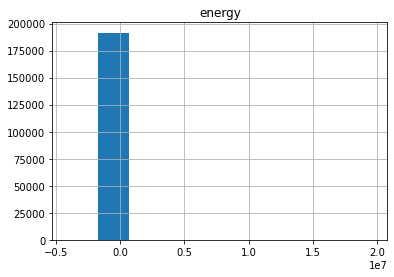

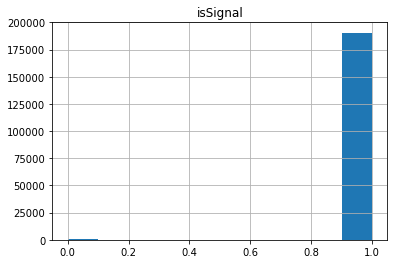

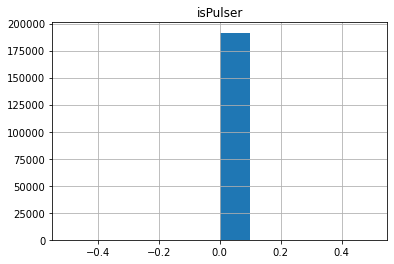

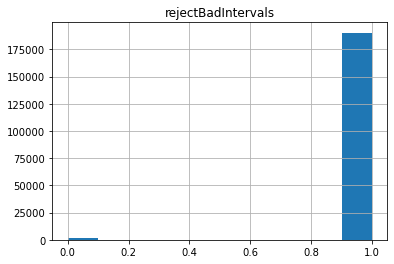

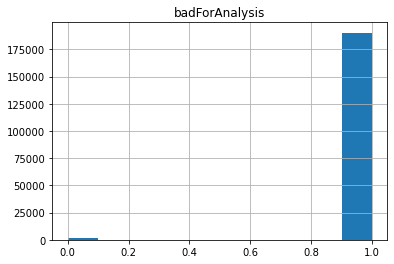

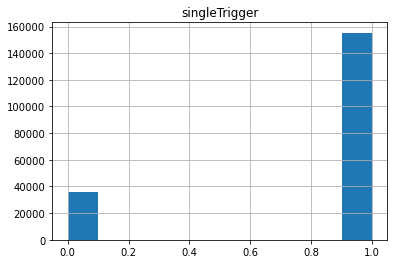

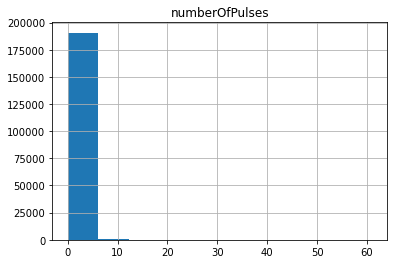

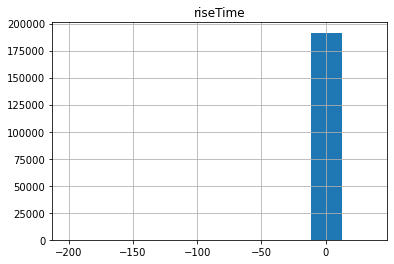

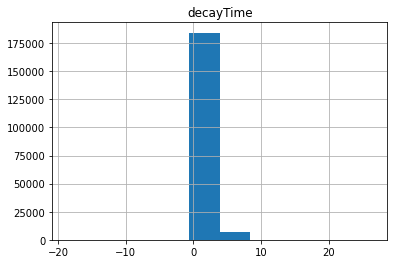

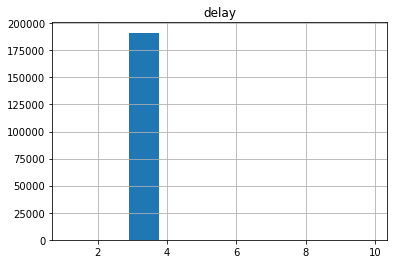

In [13]:
DescribeDataframe(dfTotal)

In [14]:
dfReduced = ReduceDataFrame(dfTotal)

"Lenient Cuts"
Cuts used -- numberOfPulses!=0 & singleTrigger!=0 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000
Size of reduced data -- 122045


In [15]:
dfReject = RejectDataFrame(dfTotal)

In [16]:
dfSuperReduced = SuperReduceDataFrame(dfTotal)

"Strict Cuts"
Cuts used -- numberOfPulses==1 & singleTrigger==1 & rejectBadIntervals==1 & badForAnalysis==1 & isSignal==1 & energy>0 & energy<10000
Size of reduced data -- 107945


### Negative energy events with signal flag

In [17]:
dfNeg = dfTotal.query('energy<0 & isSignal==1', engine='python')
print('Number of events with negative energy and signal flag ' + str(len(dfNeg)))

Number of events wuth negative energy and signal flag 131


In [18]:
dfTest = dfTotal.query('numberOfPulses==0 & isSignal==1', engine='python')
print('Number of events with 0 pulses and signal flag ' + str(len(dfTest)))

Number of events with 0 pulses and signal flag 26460


### Energy distribution of reduced events

Text(0.5, 1.0, 'Energy distribution of lenient cut events')

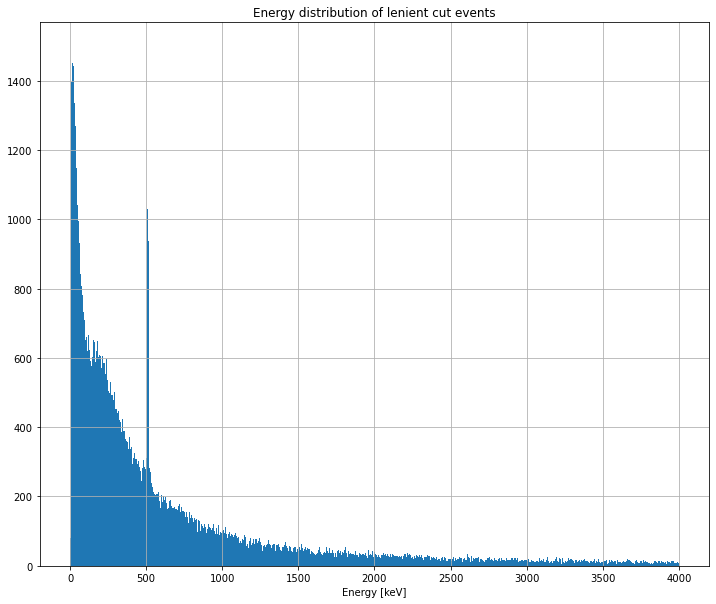

In [19]:
%matplotlib inline
dfReduced.hist(column='energy', bins=1000, figsize=(12,10), range = (0,4000))
plt.xlabel('Energy [keV]')
plt.title('Energy distribution of lenient cut events')

### Energy distribution of all events

Text(0.5, 1.0, 'Energy distribution of all events')

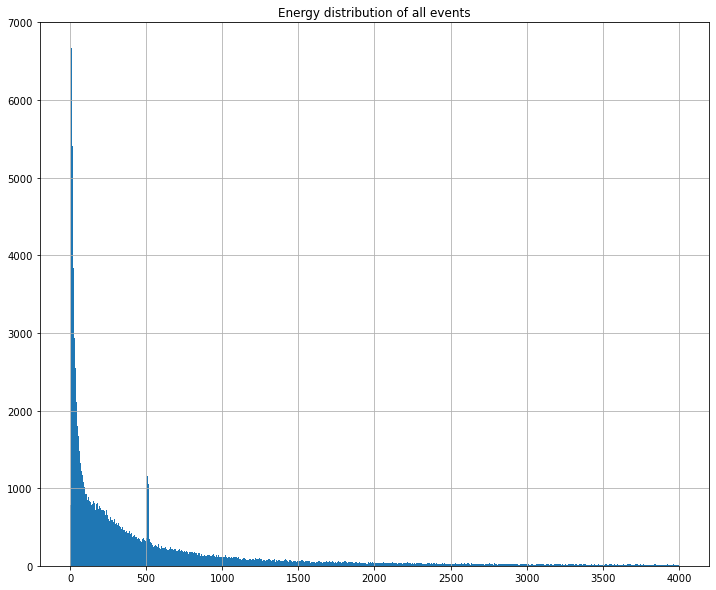

In [20]:
dfTotal_energycut = dfTotal.query('energy>0 & energy<10000')
dfTotal_energycut.hist(column='energy', bins=1000, figsize=(12,10), range = (0,4000))
plt.title('Energy distribution of all events')

### Energy distribution of rejected events

array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

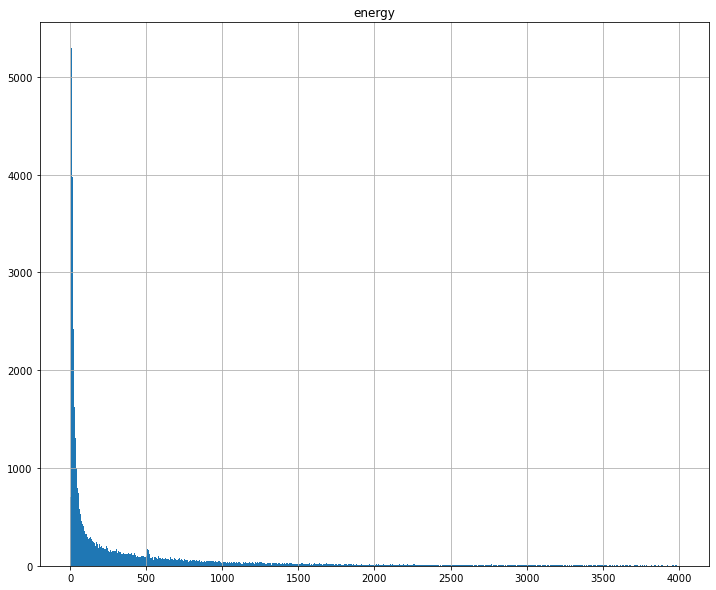

In [21]:
dfReject.hist(column='energy', bins=1000, figsize=(12,10), range = (0,4000))

### Energy distribution of super reduced events

Text(0.5, 1.0, 'Energy distribution of strict cut events')

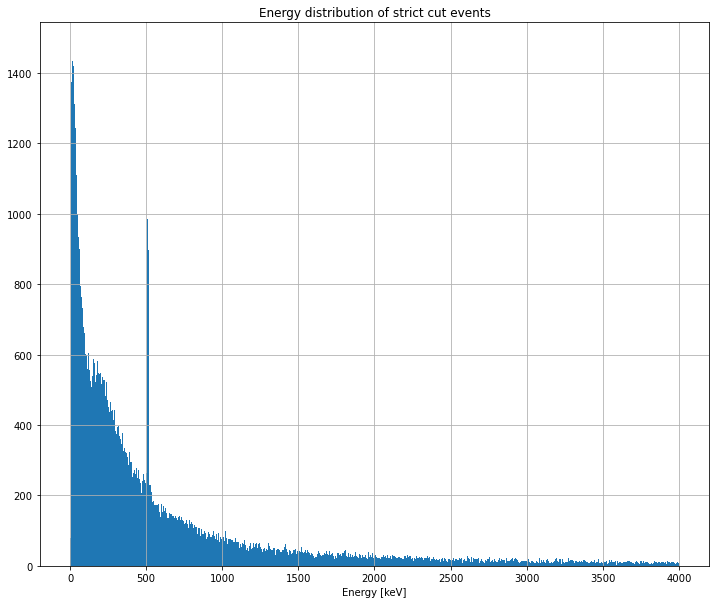

In [22]:
dfSuperReduced.hist(column='energy', bins=1000, figsize=(12,10), range = (0,4000))
plt.xlabel('Energy [keV]')
plt.title('Energy distribution of strict cut events')

### Channel distribution of reduced events

Text(0.5, 1.0, 'Distribution of events by tower (Lenient cuts)')

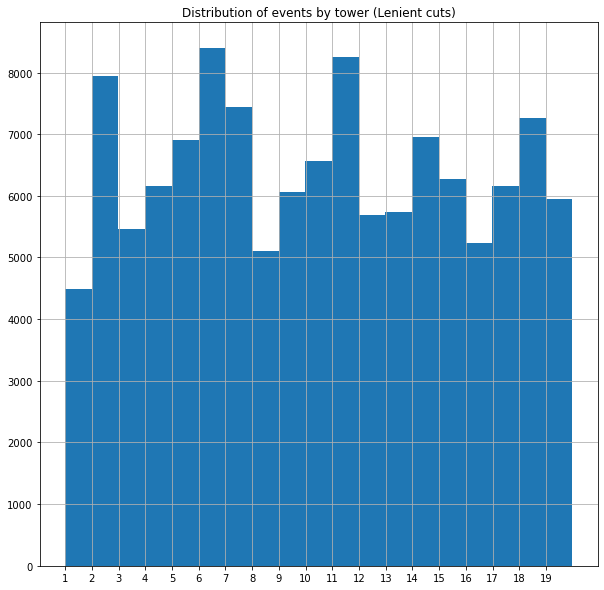

In [74]:
dfReduced.hist(column='channel', bins=19, figsize=(10,10))
plt.xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
plt.title("Distribution of events by tower (Lenient cuts)")

### Channel distribution of total events

Text(0.5, 1.0, 'Distribution of events by tower')

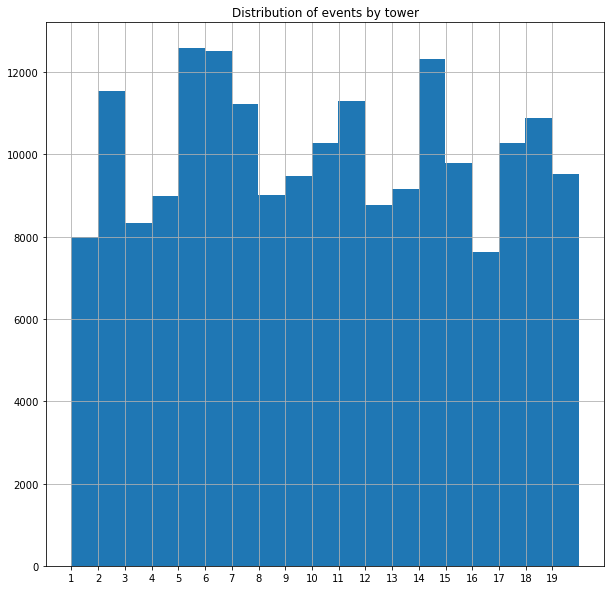

In [24]:
dfTotal.hist(column='channel', bins=19, figsize=(10,10))
plt.xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
plt.title("Distribution of events by tower")

### Channel distribution of rejected events

Text(0.5, 1.0, 'Distribution of events by tower')

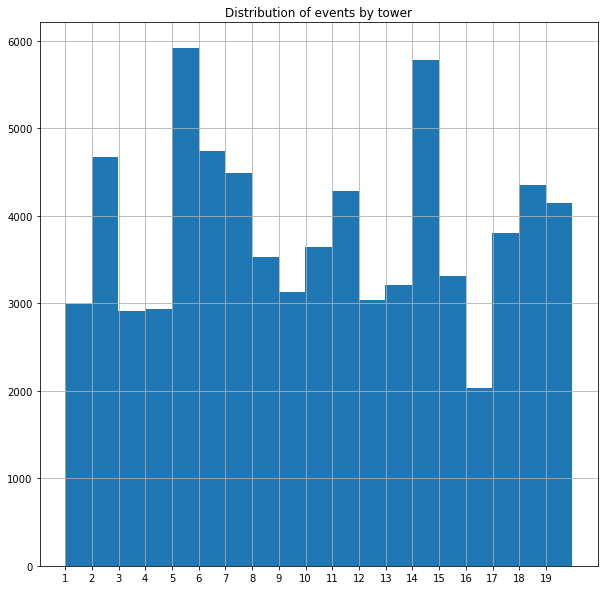

In [25]:
dfReject.hist(column='channel', bins=19, figsize=(10,10))
plt.xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
plt.title("Distribution of events by tower")

### Channel distribution of super reduced events

Text(0.5, 1.0, 'Distribution of events by tower (Strict cuts)')

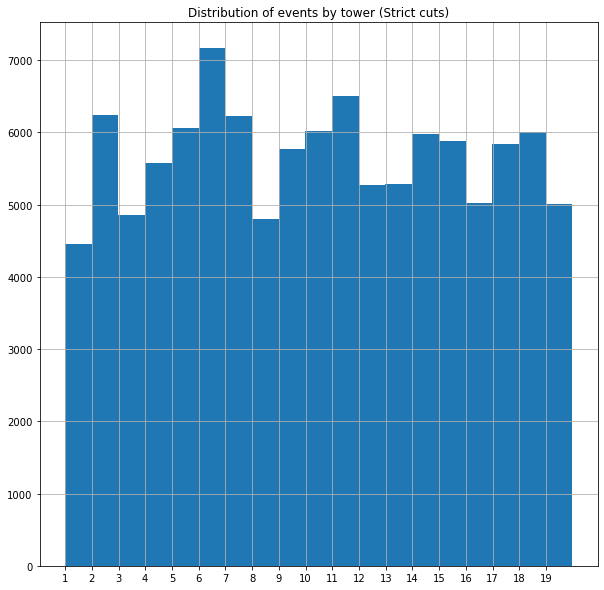

In [26]:
dfSuperReduced.hist(column='channel', bins=19, figsize=(10,10))
plt.xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
plt.title("Distribution of events by tower (Strict cuts)")

### Distribution w.r.t run number

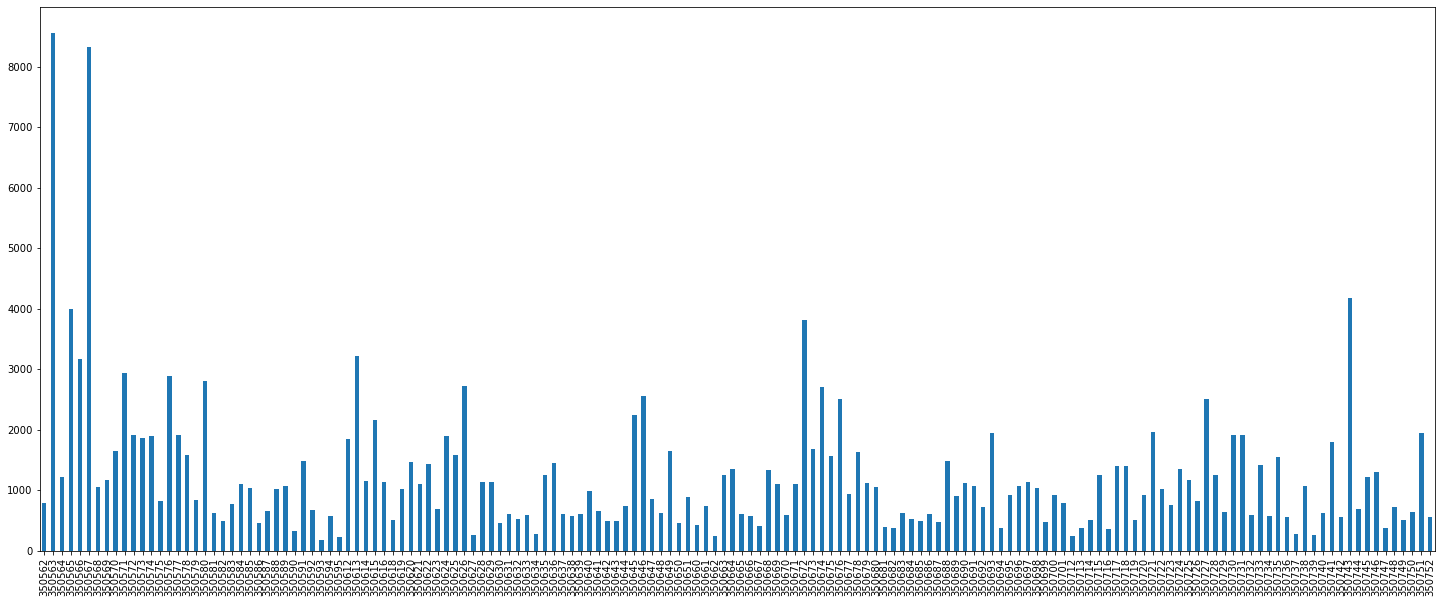

In [27]:
((dfTotal['run'].value_counts()).sort_index()).plot.bar(figsize=(25,10))
plt.xticks(fontsize=10,rotation=90);

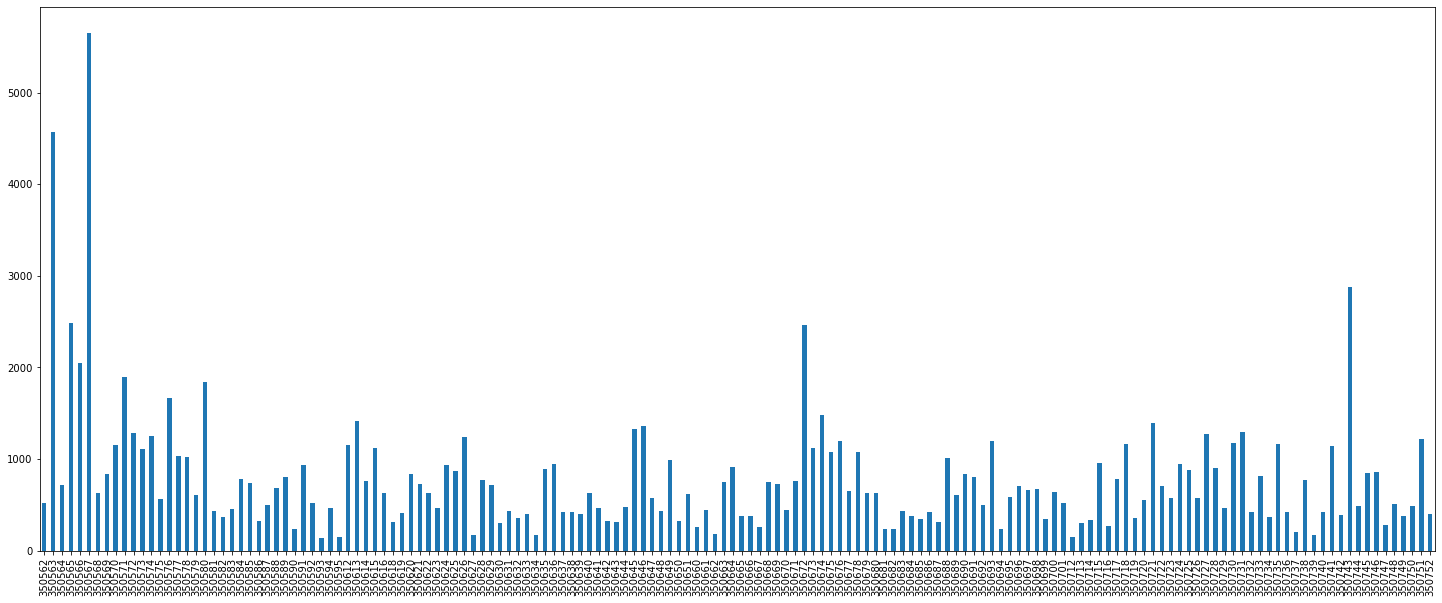

In [28]:
((dfReduced['run'].value_counts()).sort_index()).plot.bar(figsize=(25,10))
plt.xticks(fontsize=10,rotation=90);

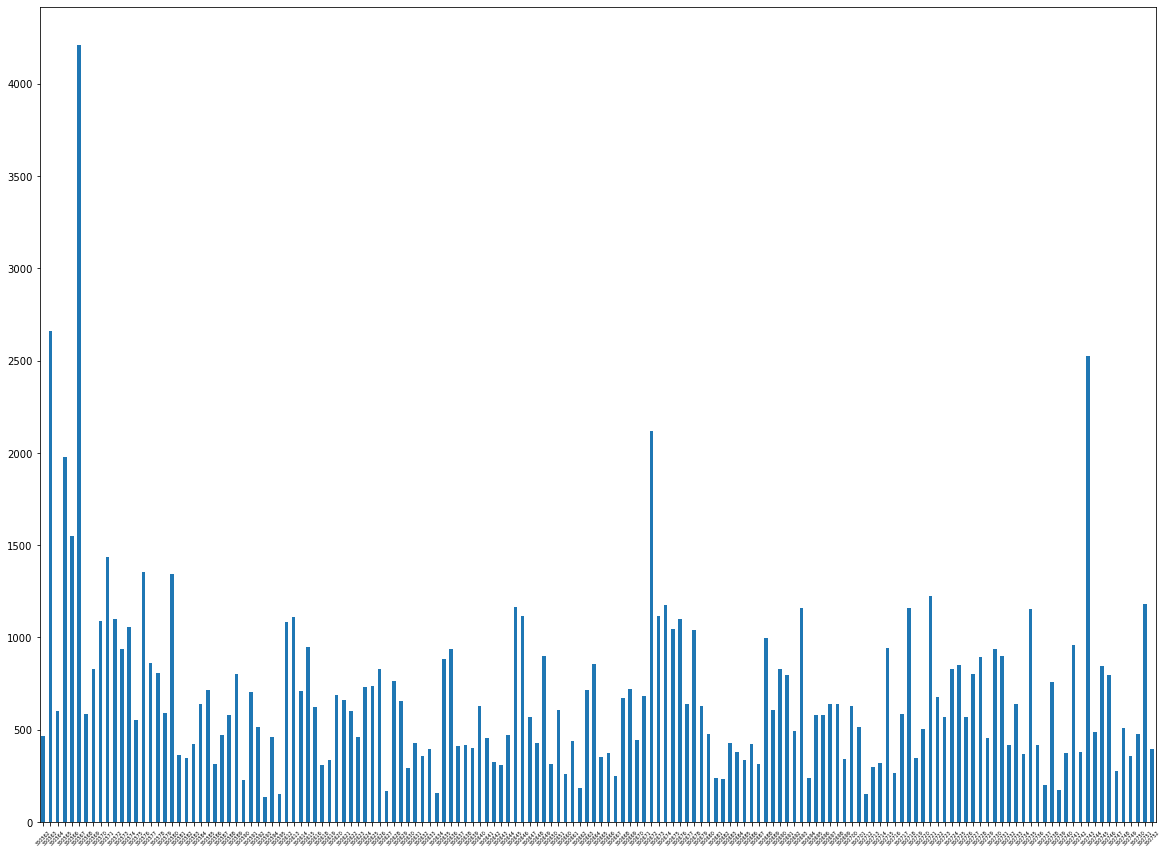

In [29]:
((dfSuperReduced['run'].value_counts()).sort_index()).plot.bar(figsize=(20,15))
plt.xticks(fontsize=5,rotation=45);

In [30]:
dfReduced['run'].min()

350562

In [31]:
dfReduced['run'].max()

350752

In [32]:
df350562 = dfReduced.query('run==350562', engine='python')

In [33]:
df350562['groupNumber'].min()

2731

In [34]:
df350562['groupNumber'].max()

2744

In [35]:
df350562['groupNumber'].unique()

<IntegerArray>
[2739, 2741, 2744, 2732, 2738, 2743, 2731, 2733, 2734, 2740, 2735, 2737, 2742,
 2736]
Length: 14, dtype: Int64

/global/common/software/nersc/pm-2022q3/sw/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


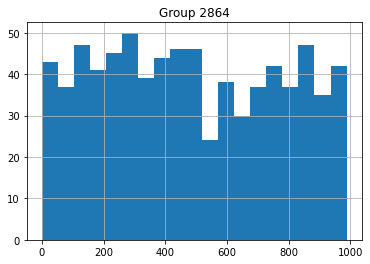

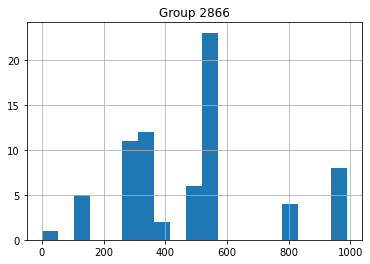

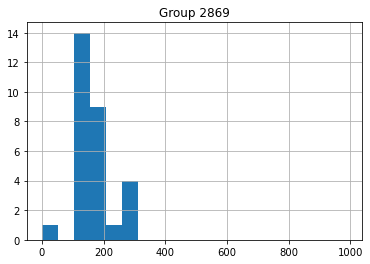

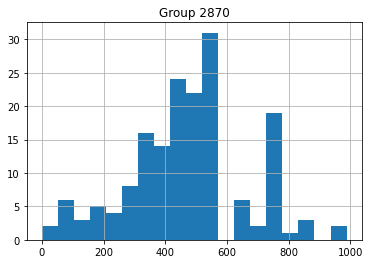

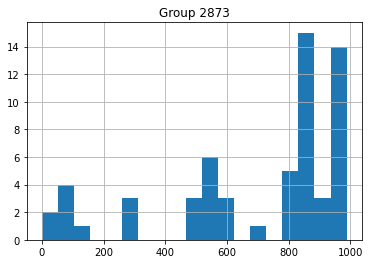

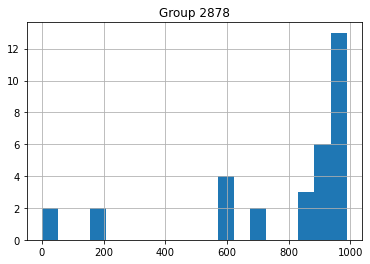

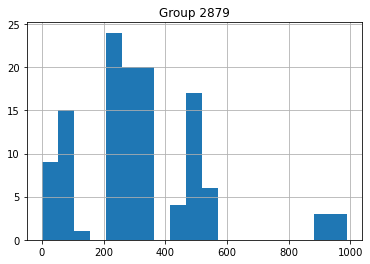

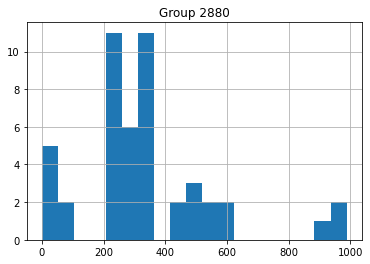

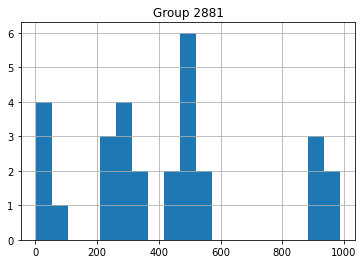

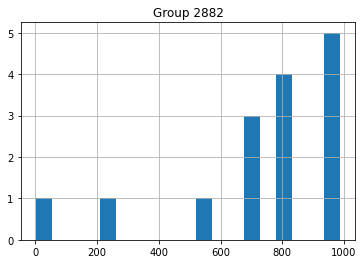

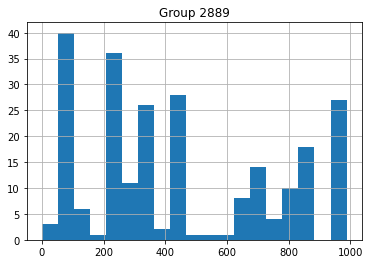

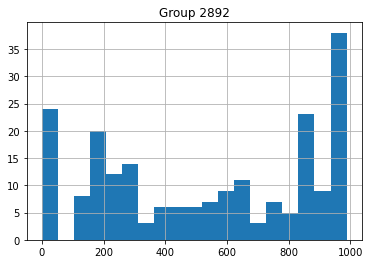

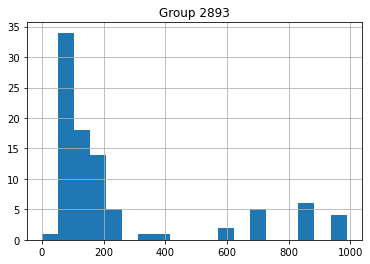

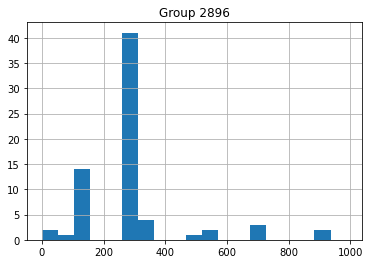

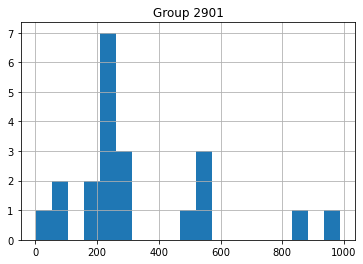

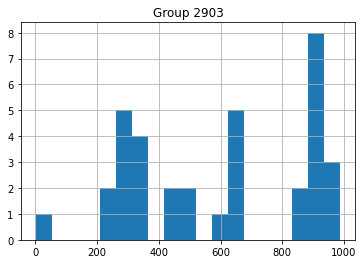

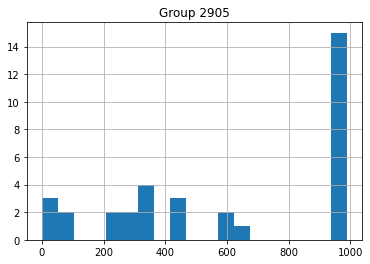

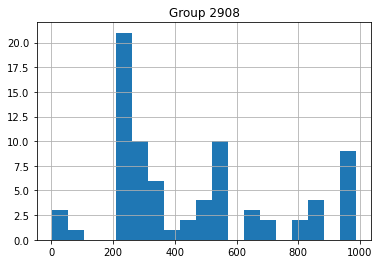

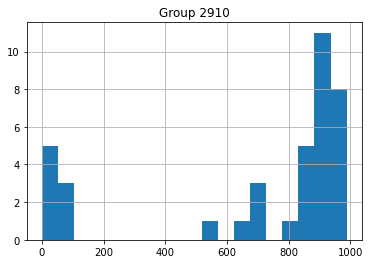

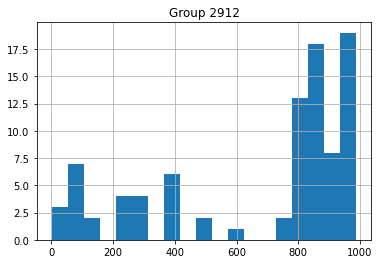

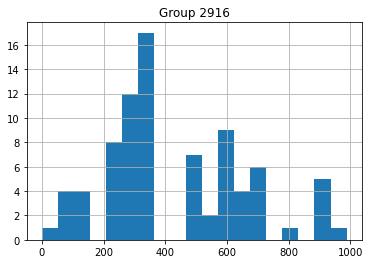

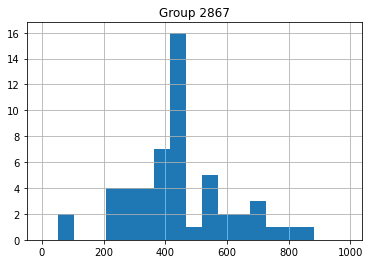

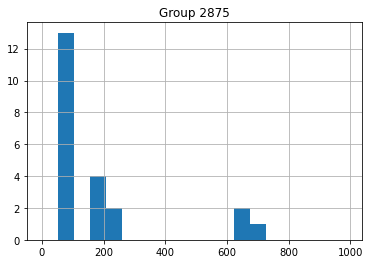

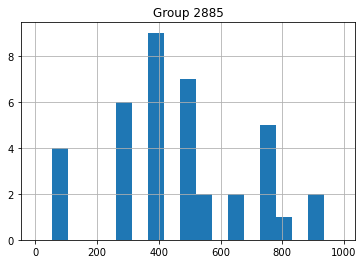

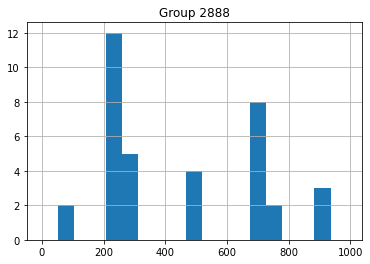

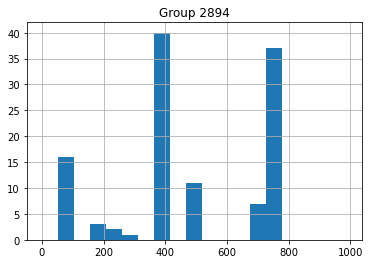

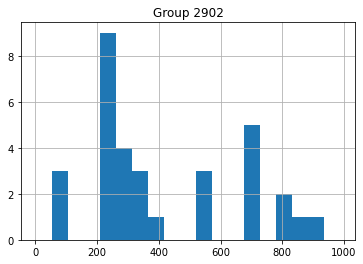

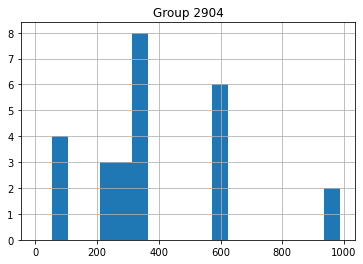

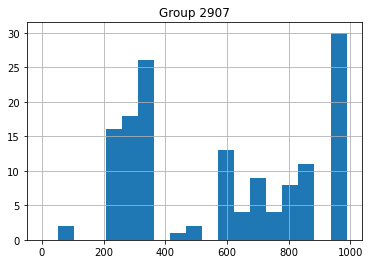

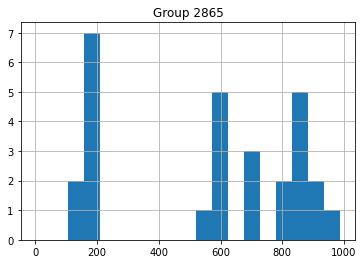

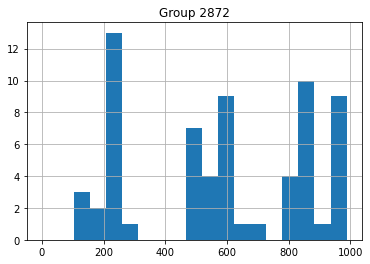

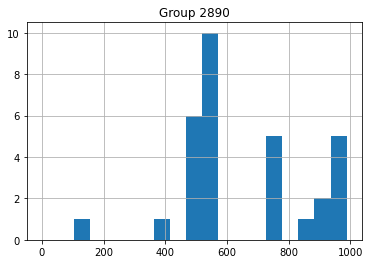

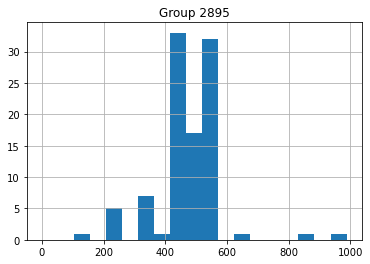

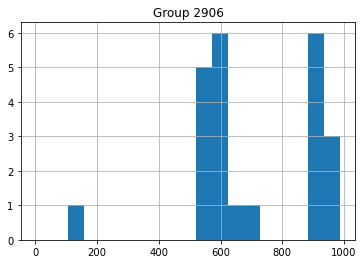

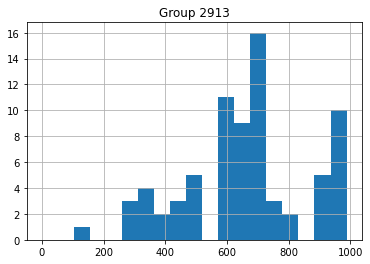

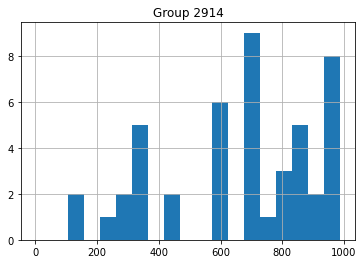

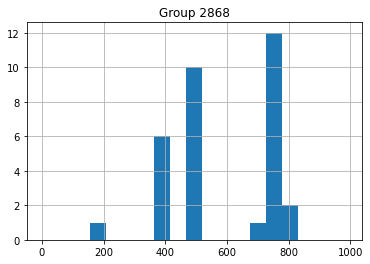

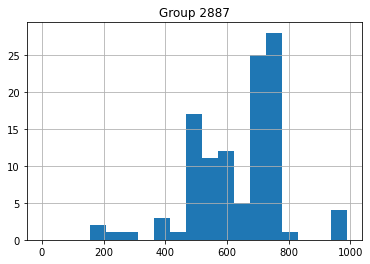

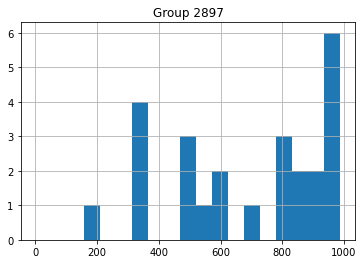

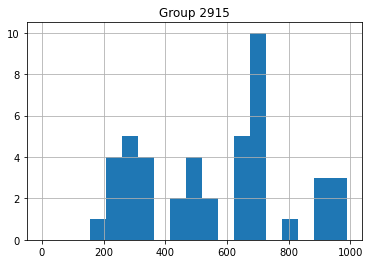

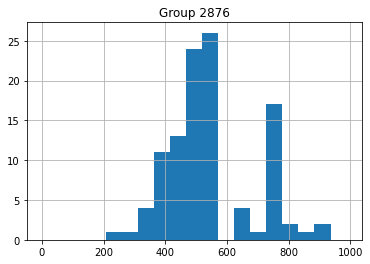

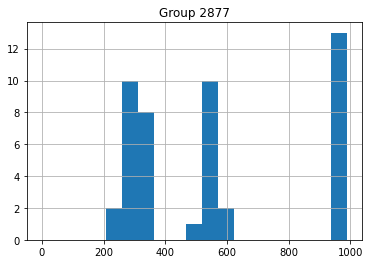

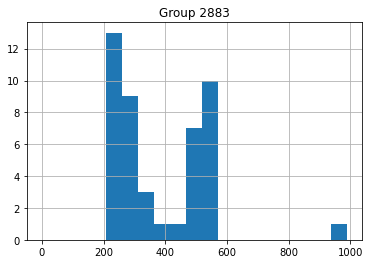

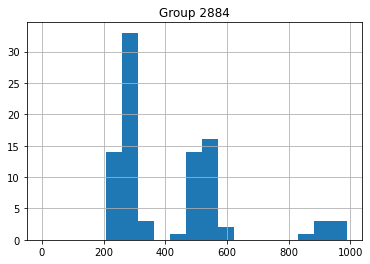

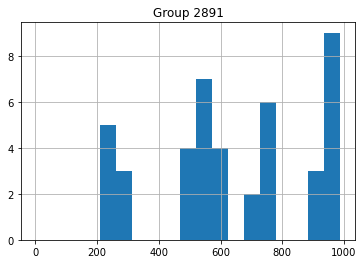

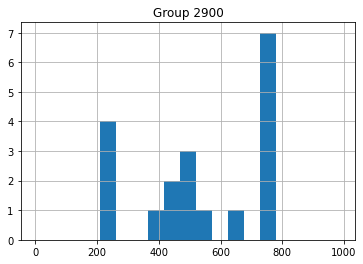

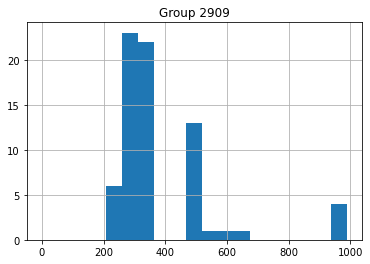

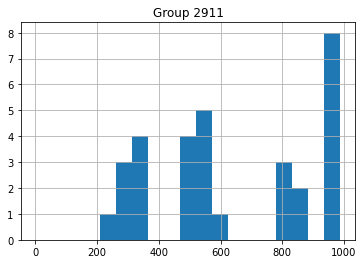

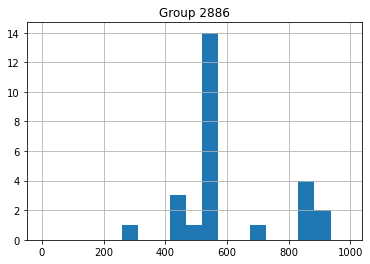

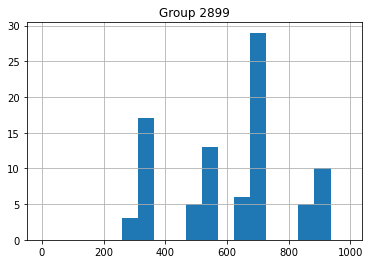

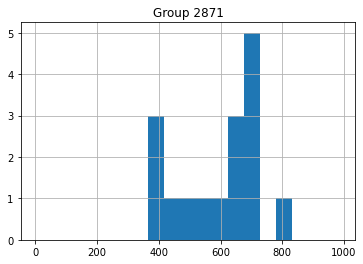

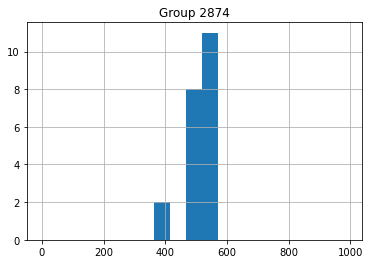

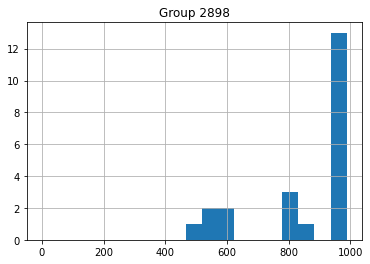

In [36]:
%matplotlib inline
n=350565
dfRunCut = dfTotal.query(f'run=={n}', engine='python')
for group in dfRunCut['groupNumber'].unique():
    dfRunCut.query((f'groupNumber=={group}'), engine='python').hist(column='channel', bins=19, range=(1,988))
    plt.title(f'Group {group}')

In [37]:
m=350569
dfRunCut2 = dfTotal.query(f'run=={m}', engine='python')
print((dfRunCut2['groupNumber'].unique()).size)

16


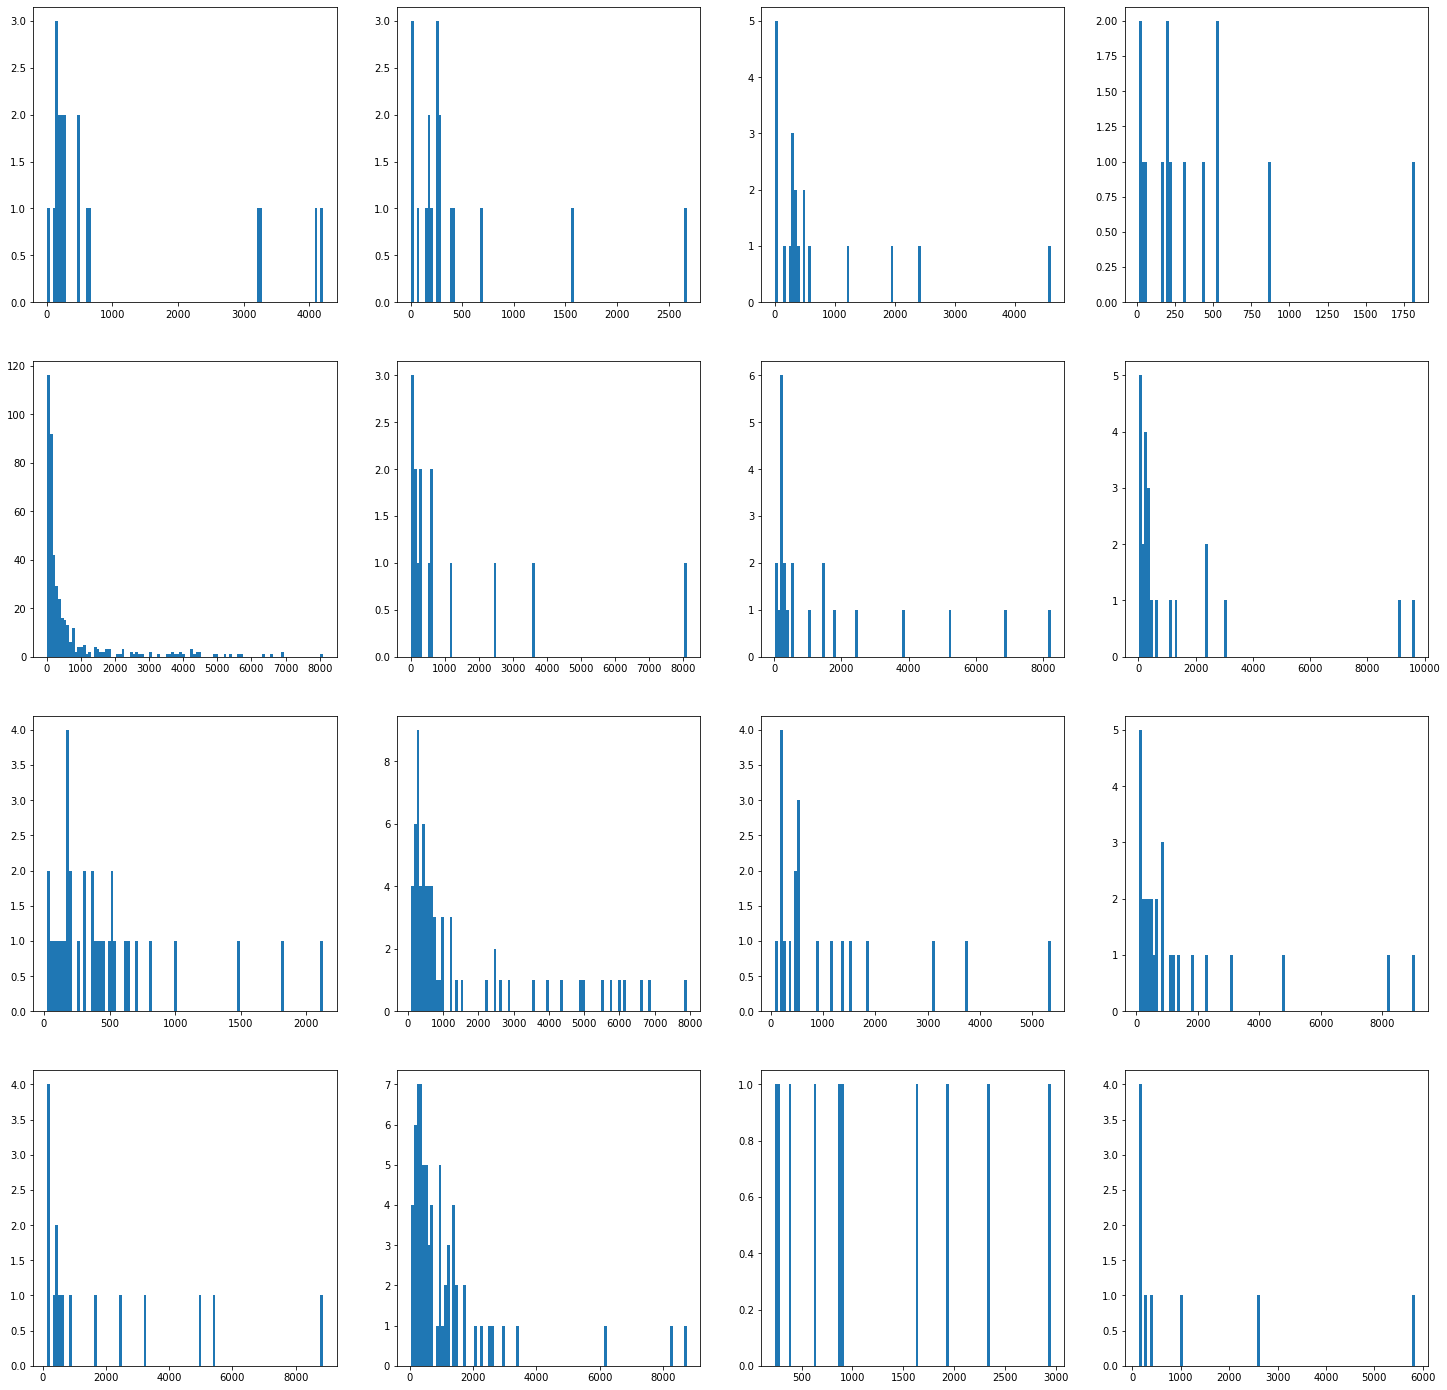

In [38]:
%matplotlib inline
n=350569
dfRunCut = dfReduced.query(f'run=={n}', engine='python')
#print((dfRunCut['groupNumber'].unique()).size)
fig, ax = plt.subplots(4,4, figsize=(25,25))
ax = ax.flatten()
for i, group in enumerate(dfRunCut['groupNumber'].unique()):
    #print(i)
    #ax[i] = dfRunCut.query((f'groupNumber=={group}'), engine='python').hist(column='energy', bins=100)
    ax[i].hist(dfRunCut.query((f'groupNumber=={group}'), engine='python')['energy'], bins=100)
    #plt.title(f'{group}')

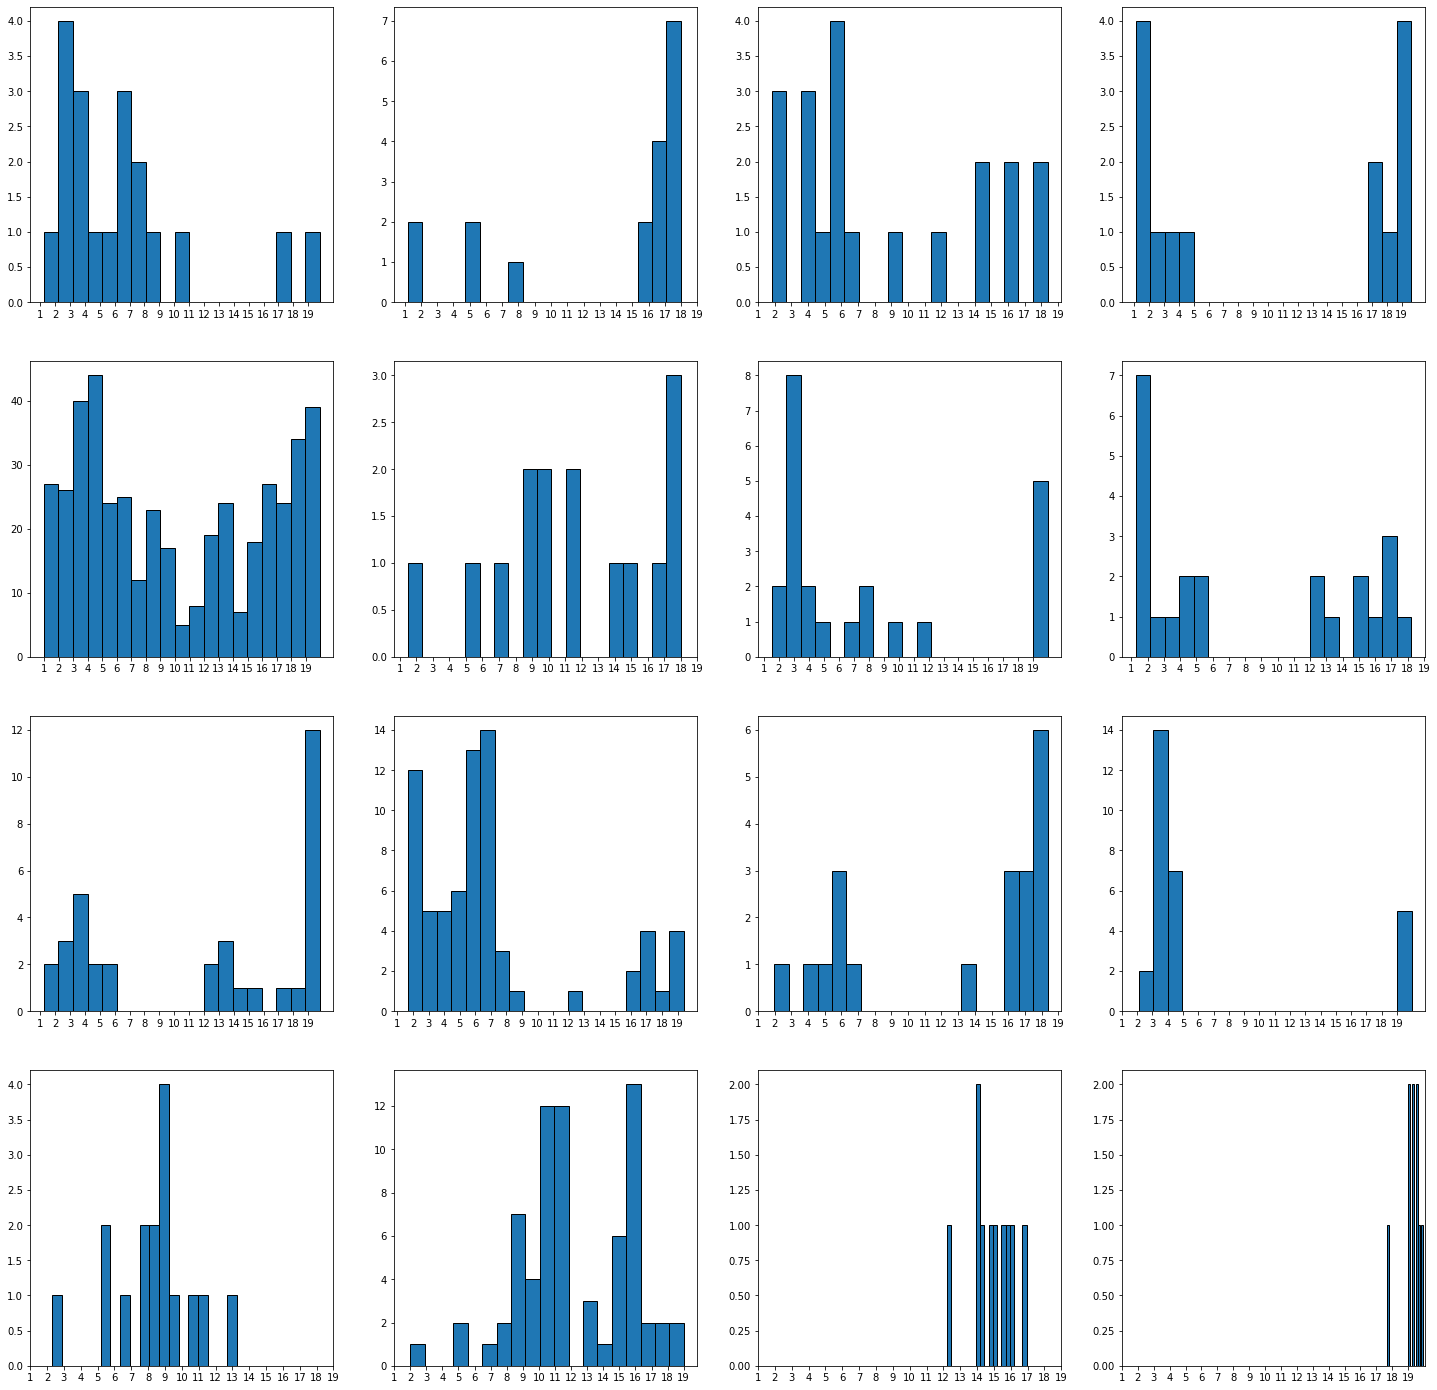

In [39]:
%matplotlib inline
n=350569
dfRunCut = dfReduced.query(f'run=={n}', engine='python')
#print((dfRunCut['groupNumber'].unique()).size)
fig, ax = plt.subplots(4,4, figsize=(25,25))
ax = ax.flatten()
for i, group in enumerate(dfRunCut['groupNumber'].unique()):
    #print(i)
    #ax[i] = dfRunCut.query((f'groupNumber=={group}'), engine='python').hist(column='energy', bins=100)
    ax[i].hist(dfRunCut.query((f'groupNumber=={group}'), engine='python')['channel'], bins=19, edgecolor='black')
    ax[i].set_xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
    #plt.title(f'{group}')

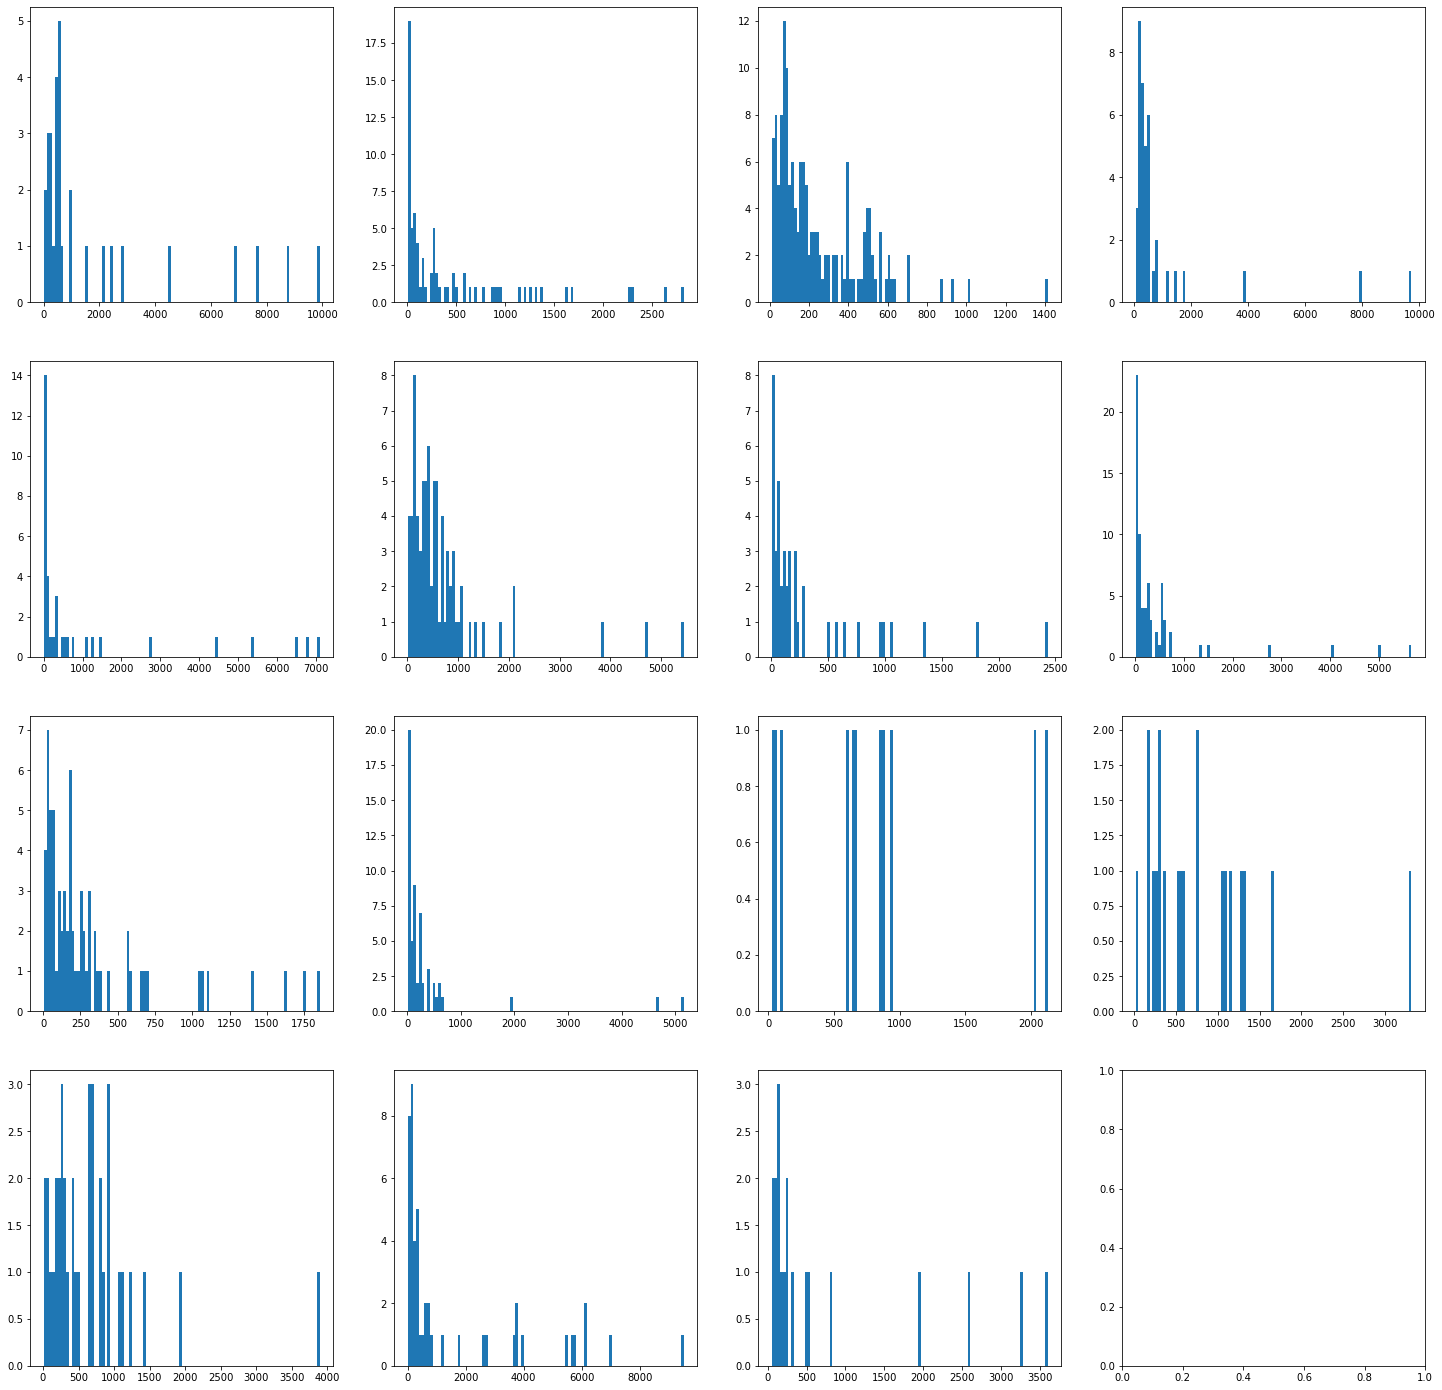

In [40]:
%matplotlib inline
n=350584
dfRunCut = dfReduced.query(f'run=={n}', engine='python')
#print((dfRunCut['groupNumber'].unique()).size)
fig, ax = plt.subplots(4,4, figsize=(25,25))
ax = ax.flatten()
for i, group in enumerate(dfRunCut['groupNumber'].unique()):
    #print(i)
    #ax[i] = dfRunCut.query((f'groupNumber=={group}'), engine='python').hist(column='energy', bins=100)
    ax[i].hist(dfRunCut.query((f'groupNumber=={group}'), engine='python')['energy'], bins=100)
    #plt.title(f'{group}')

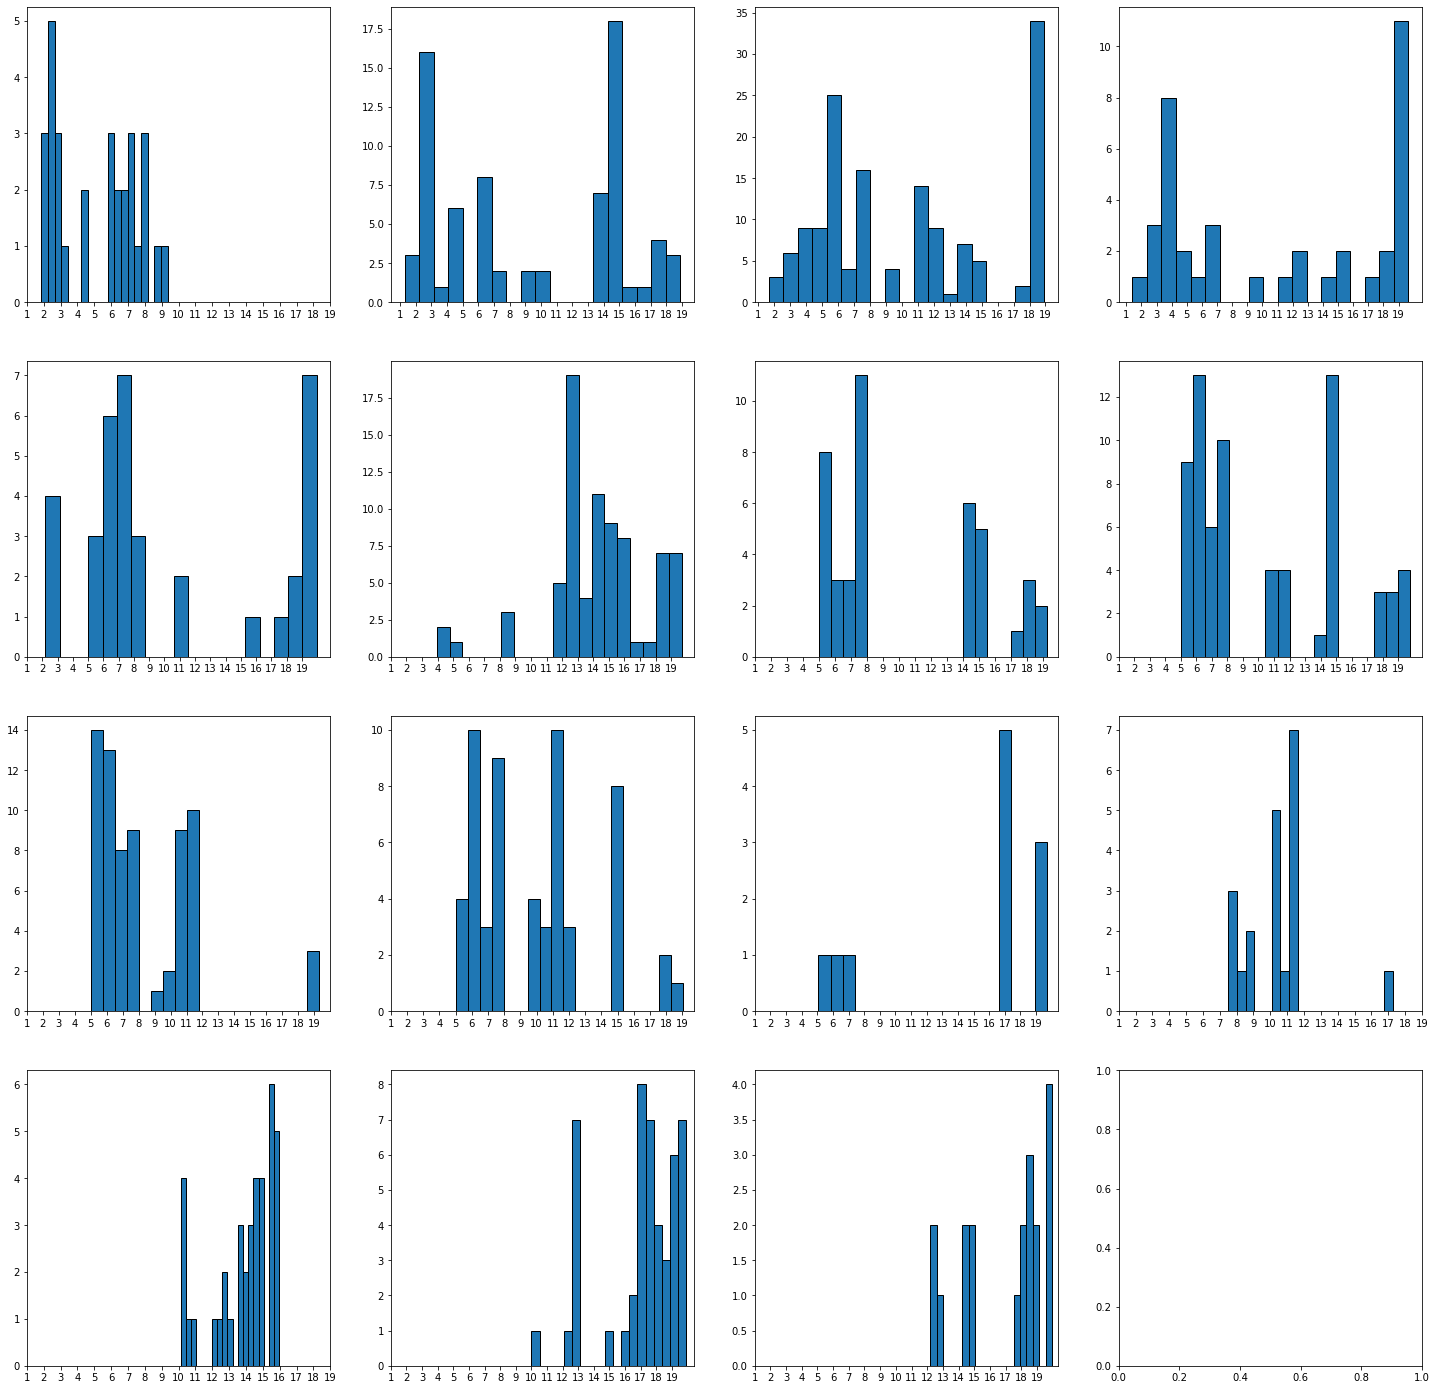

In [41]:
%matplotlib inline
n=350584
dfRunCut = dfReduced.query(f'run=={n}', engine='python')
#print((dfRunCut['groupNumber'].unique()).size)
fig, ax = plt.subplots(4,4, figsize=(25,25))
ax = ax.flatten()
for i, group in enumerate(dfRunCut['groupNumber'].unique()):
    #print(i)
    #ax[i] = dfRunCut.query((f'groupNumber=={group}'), engine='python').hist(column='energy', bins=100)
    ax[i].hist(dfRunCut.query((f'groupNumber=={group}'), engine='python')['channel'], bins=19, edgecolor='black')
    ax[i].set_xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
    #plt.title(f'{group}')

In [43]:
for run in dfTotal['run'].unique():
    dfRun = dfTotal.query((f'run=={run}'), engine='python')
    for group in dfRun['groupNumber'].unique():
        dfGroup = dfRun.query((f'groupNumber=={group}'), engine='python')
        if(len(dfGroup)>450):
            print(str(run) + ' -- ' + str(group) + ' -- ' + str(dfGroup.iloc[0]['timeStamp']))

350616 -- 3640 -- 2019-05-24 17:21:11.558283+00:50
350751 -- 5304 -- 2019-10-12 20:08:09.978089+00:50
350751 -- 5307 -- 2019-10-12 23:49:42.749956+00:50
350731 -- 5062 -- 2019-09-23 03:26:44.750056+00:50
350741 -- 5171 -- 2019-10-02 14:33:11.894811+00:50
350725 -- 4954 -- 2019-09-17 07:21:40.420313+00:50
350569 -- 3117 -- 2019-04-06 19:18:19.552017+00:50
350678 -- 4507 -- 2019-08-03 04:21:28.927662+00:50
350612 -- 3540 -- 2019-05-19 21:38:09.233827+00:50
350677 -- 4495 -- 2019-08-02 06:22:42.821897+00:50
350673 -- 4394 -- 2019-07-28 14:32:35.917958+00:50
350673 -- 4397 -- 2019-07-29 00:11:37.956646+00:50
350679 -- 4519 -- 2019-08-04 08:31:38.548738+00:50
350718 -- 4845 -- 2019-09-09 16:17:48.500637+00:50
350591 -- 3509 -- 2019-04-29 07:24:43.196234+00:50
350728 -- 5014 -- 2019-09-19 23:10:53.668997+00:50
350576 -- 3252 -- 2019-04-13 14:49:17.787012+00:50
350735 -- 5117 -- 2019-09-27 06:41:49.146663+00:50
350698 -- 4734 -- 2019-08-22 22:04:21.970595+00:50
350572 -- 3190 -- 2019-04-10 10

In [44]:
for run in dfSuperReduced['run'].unique():
    dfRun = dfSuperReduced.query((f'run=={run}'), engine='python')
    for group in dfRun['groupNumber'].unique():
        dfGroup = dfRun.query((f'groupNumber=={group}'), engine='python')
        if(len(dfGroup)>450):
            print(str(run) + ' -- ' + str(group) + ' -- ' + str(dfGroup.iloc[0]['timeStamp']))

350612 -- 3540 -- 2019-05-19 21:38:09.233827+00:50
350718 -- 4845 -- 2019-09-09 16:17:48.500637+00:50
350728 -- 5014 -- 2019-09-19 23:10:53.668997+00:50
350735 -- 5117 -- 2019-09-27 06:41:49.146663+00:50
350743 -- 5202 -- 2019-10-04 17:15:42.915097+00:50
350565 -- 2864 -- 2019-04-02 16:26:34.950646+00:50
350651 -- 4171 -- 2019-06-30 11:34:39.621501+00:50
350715 -- 4804 -- 2019-09-07 10:38:57.053891+00:50


In [45]:
dfTotal.query('run==350563 & groupNumber==2752',engine='python')

,run,channel,time,eventNumber,groupNumber,energy,isSignal,isPulser,rejectBadIntervals,badForAnalysis,singleTrigger,numberOfPulses,timeStamp,riseTime,decayTime,delay
169497,350563,1,34864.8,1010533,2752,205.7510,1,0,1,1,1,1,2019-04-01 08:49:31.737547+00:50,0.556120,6.03571,3.16841
169498,350563,25,34864.8,1010536,2752,63.3195,1,0,1,1,1,1,2019-04-01 08:49:31.737547+00:50,0.798509,2.02061,3.18773
169499,350563,40,34864.9,1010540,2752,148.5020,1,0,1,1,1,1,2019-04-01 08:49:31.737547+00:50,1.090630,5.43470,3.24732
169500,350563,27,34864.8,1010545,2752,122.1420,1,0,1,1,1,1,2019-04-01 08:49:31.737547+00:50,0.753460,5.35879,3.19953
169501,350563,28,34864.9,1010556,2752,100.5620,1,0,1,1,1,1,2019-04-01 08:49:31.737547+00:50,0.641264,4.99844,3.25177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177538,350563,938,34865.1,1010833,2752,1689.7200,1,0,1,1,1,2,2019-04-01 08:49:31.737547+00:50,0.503373,3.06742,3.19589
177539,350563,949,34865.1,1010836,2752,1187.5400,1,0,1,1,1,2,2019-04-01 08:49:31.737547+00:50,0.665831,0.00000,3.16434
177540,350563,940,34865.1,1010840,2752,477.5020,1,0,1,1,0,1,2019-04-01 08:49:31.737547+00:50,0.749265,4.07780,3.21644
177541,350563,948,34865.1,1010841,2752,2769.2300,1,0,0,0,1,3,2019-04-01 08:49:31.737547+00:50,0.568374,0.00000,3.15954


### Distribution of timing variables 

array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

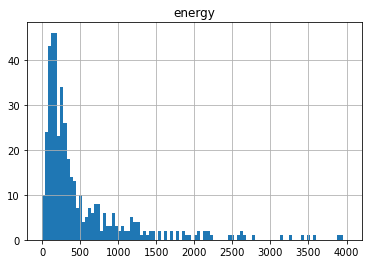

In [46]:
dfTotal.query('run==350563 & groupNumber==2752',engine='python').hist(column='energy', bins=100, range=(0,4000))

array([[<AxesSubplot:title={'center':'riseTime'}>]], dtype=object)

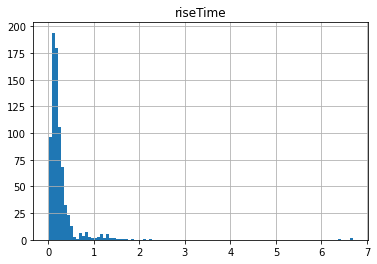

In [47]:
dfTotal.query('run==350565 & groupNumber==2864', engine='python').hist(column='riseTime', bins=100)

array([[<AxesSubplot:title={'center':'decayTime'}>]], dtype=object)

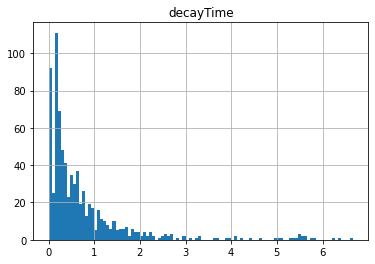

In [48]:
dfTotal.query('run==350565 & groupNumber==2864', engine='python').hist(column='decayTime', bins=100)

In [49]:
for run in dfReduced['run'].unique():
    dfRun = dfReduced.query((f'run=={run}'), engine='python')
    for group in dfRun['groupNumber'].unique():
        dfGroup = dfRun.query((f'groupNumber=={group}'), engine='python')
        if(len(dfGroup)>450):
            print(str(run) + ' -- ' + str(group) + ' -- ' + str(dfGroup.iloc[0]['timeStamp']) + ' -- ' + str(len(dfGroup)))

350612 -- 3540 -- 2019-05-19 21:38:09.233827+00:50 -- 684
350718 -- 4845 -- 2019-09-09 16:17:48.500637+00:50 -- 810
350728 -- 5014 -- 2019-09-19 23:10:53.668997+00:50 -- 492
350735 -- 5117 -- 2019-09-27 06:41:49.146663+00:50 -- 600
350743 -- 5202 -- 2019-10-04 17:15:42.915097+00:50 -- 626
350565 -- 2864 -- 2019-04-02 16:26:34.950646+00:50 -- 494
350651 -- 4171 -- 2019-06-30 11:34:39.621501+00:50 -- 488
350715 -- 4804 -- 2019-09-07 10:38:57.053891+00:50 -- 606
350563 -- 2782 -- 2019-04-01 09:04:51.898525+00:50 -- 469


In [52]:
dfReduced['timeStamp'] = pd.to_datetime(dfReduced['timeStamp'])

/tmp/ipykernel_161551/1071335512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReduced['timeStamp'] = pd.to_datetime(dfReduced['timeStamp'])


In [53]:
time_of_day = dfReduced['timeStamp'].dt.time

### Distribution of events w.r.t. hour of day (Lenient cuts)

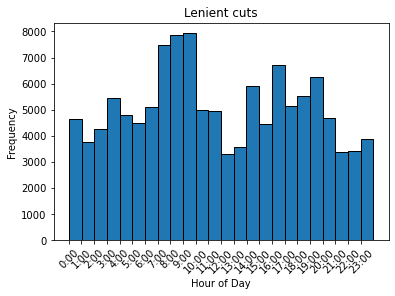

In [54]:
seconds = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfReduced['timeStamp']]
plt.hist(seconds, bins=24, edgecolor='black');
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Lenient cuts')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);

In [55]:
dfTotal['timeStamp'] = pd.to_datetime(dfTotal['timeStamp'])
seconds2 = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfTotal['timeStamp']]

### Distribution of events w.r.t. hour of day (No cuts)

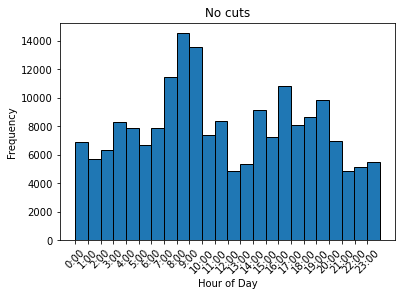

In [56]:
plt.hist(seconds2, bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('No cuts')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);

### Distribution of events w.r.t. hour of day (Strict cuts)

/tmp/ipykernel_161551/1046409500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfSuperReduced['timeStamp'] = pd.to_datetime(dfSuperReduced['timeStamp'])


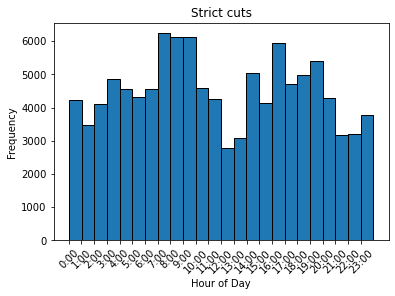

In [57]:
dfSuperReduced['timeStamp'] = pd.to_datetime(dfSuperReduced['timeStamp'])
seconds3 = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfSuperReduced['timeStamp']]
plt.hist(seconds3, bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Strict cuts')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);

In [58]:
dfEnergyReduced = dfSuperReduced.query('energy>500', engine='python')

In [59]:
dfReduced.query('numberOfPulses>1 & energy>500 & run==350641', engine='python')

,run,channel,time,eventNumber,groupNumber,energy,isSignal,isPulser,rejectBadIntervals,badForAnalysis,singleTrigger,numberOfPulses,timeStamp,riseTime,decayTime,delay
454,350641,717,71944.7,1438583,4016,1412.27,1,0,1,1,1,2,2019-06-21 10:23:21.572794+00:50,0.184396,0.442411,3.19550
482,350641,754,50454.1,1011784,4010,761.42,1,0,1,1,1,2,2019-06-21 04:25:11.025223+00:50,0.150166,0.320896,3.15869
489,350641,771,64993.9,1297846,4014,2664.44,1,0,1,1,1,2,2019-06-21 08:27:30.798654+00:50,0.123038,0.376032,3.12203


### Distribution of events w.r.t. hour of day (Strict cuts with energy > 500 keV)

/tmp/ipykernel_161551/3486058435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEnergyReduced['timeStamp'] = pd.to_datetime(dfEnergyReduced['timeStamp'])


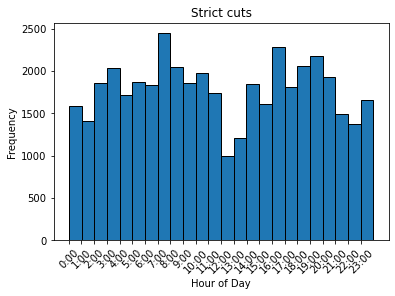

In [60]:
dfEnergyReduced['timeStamp'] = pd.to_datetime(dfEnergyReduced['timeStamp'])
seconds3 = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfEnergyReduced['timeStamp']]
plt.hist(seconds3, bins=24, edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Strict cuts')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);

In [61]:
dfM = dfReduced.query('numberOfPulses>1 & energy>200', engine='python')

array([[<AxesSubplot:title={'center':'energy'}>]], dtype=object)

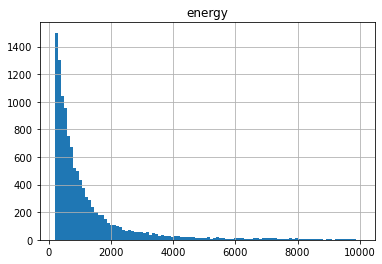

In [62]:
dfM.hist(column='energy', bins=100)

Text(0.5, 1.0, 'Channel distribution for NumPulses>1')

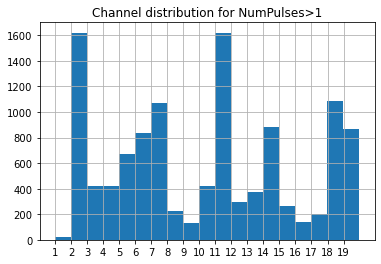

In [63]:
dfM.hist(column='channel', bins=19)
plt.xticks(range(1, 988, 52), [str(i) for i in range(1, 20, 1)]);
plt.title('Channel distribution for NumPulses>1')

Text(0.5, 1.0, 'Distribution of rise time for NumPulses>1')

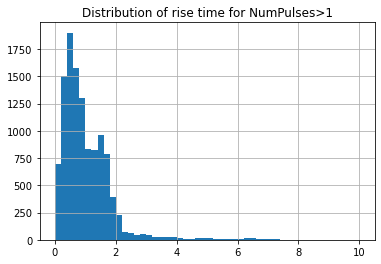

In [64]:
dfM.hist(column='riseTime', bins=50, range=(0,10))
plt.title("Distribution of rise time for NumPulses>1")

Text(0.5, 1.0, 'Distribution of decay time for NumPulses>1')

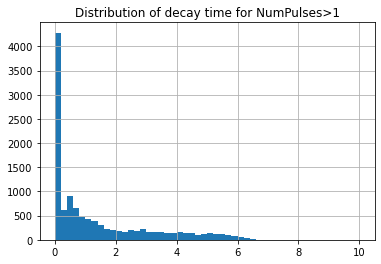

In [65]:
dfM.hist(column='decayTime', bins=50, range=(0,10))
plt.title("Distribution of decay time for NumPulses>1")

array([[<AxesSubplot:title={'center':'delay'}>]], dtype=object)

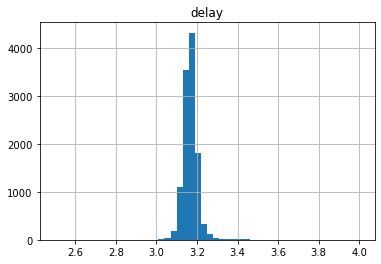

In [66]:
dfM.hist(column='delay', bins=50, range=(2.5,4))

### Comapring distribution of events w.r.t. hour of day for weekends and weekdays

In [68]:
#Runs on weekends
weekendRuns = [350569, 350576, 350583, 350590, 350623, 350630, 350636, 350643, 350650, 350665]

In [69]:
#Runs on weekdays
weekdayRuns = [350365, 350379, 350586, 350593, 350626, 350633, 350639, 350646, 350661, 350662]

In [70]:
dfWeekend = dfReduced.query('run==@weekendRuns', engine='python')
dfWeekday = dfReduced.query('run==@weekdayRuns', engine='python')

/tmp/ipykernel_161551/879440985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWeekend['timeStamp'] = pd.to_datetime(dfWeekend['timeStamp'])


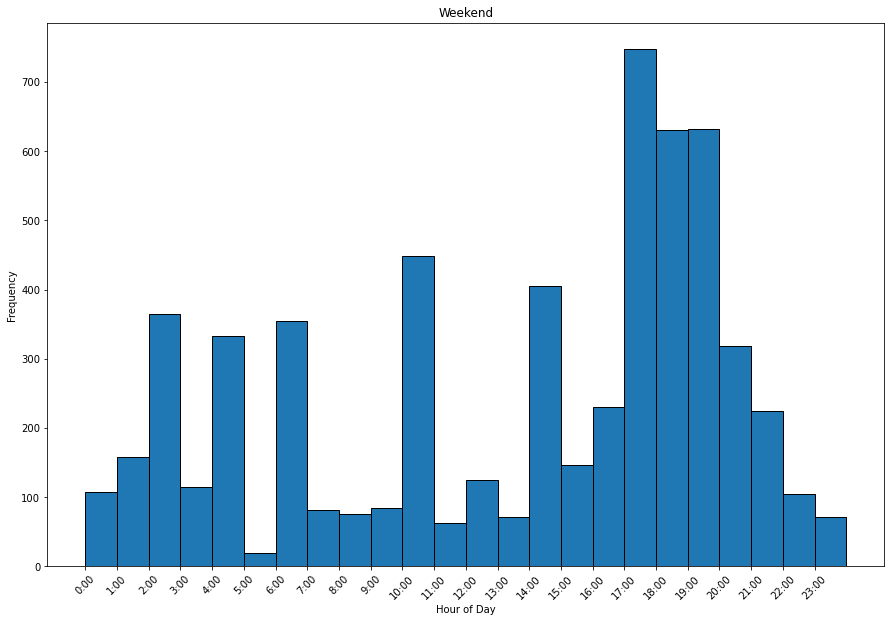

In [79]:
dfWeekend['timeStamp'] = pd.to_datetime(dfWeekend['timeStamp'])
seconds4 = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfWeekend['timeStamp']]
plt.figure(figsize=(15,10))
plt.hist(seconds4, bins=24, edgecolor='black', range=(0,86400))
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Weekend')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);


/tmp/ipykernel_161551/767543007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWeekday['timeStamp'] = pd.to_datetime(dfWeekday['timeStamp'])


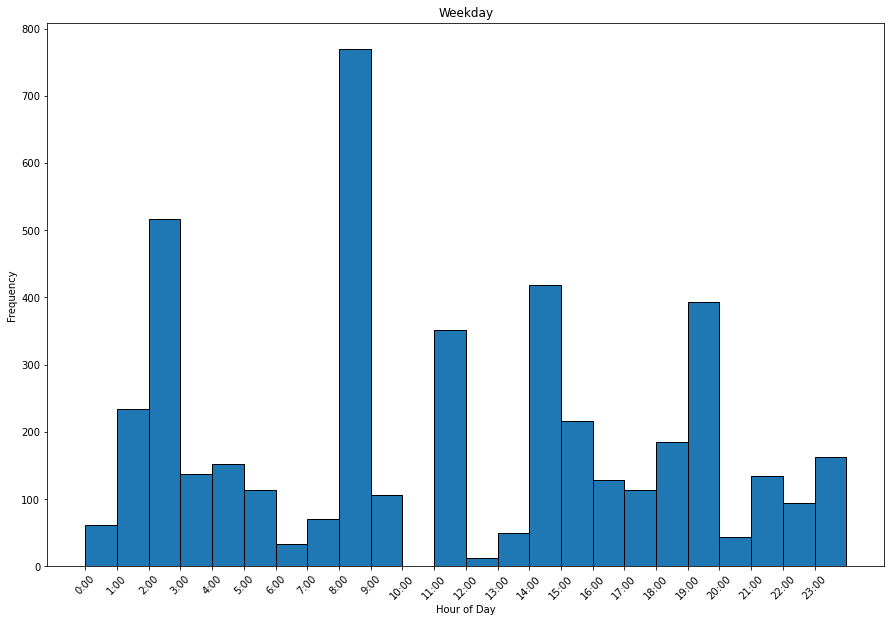

In [80]:
dfWeekday['timeStamp'] = pd.to_datetime(dfWeekday['timeStamp'])
seconds5 = [(t.hour * 3600) + (t.minute * 60) + t.second for t in dfWeekday['timeStamp']]
plt.figure(figsize=(15,10))
plt.hist(seconds5, bins=24, edgecolor='black', range=(0,86400))
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Weekday')
# Adjust x-axis ticks and labels
plt.xticks(range(0, 86400, 3600), [str(i) + ':00' for i in range(0, 24, 1)], rotation=45);